In [159]:
import numpy as np
from matplotlib import pyplot as plt

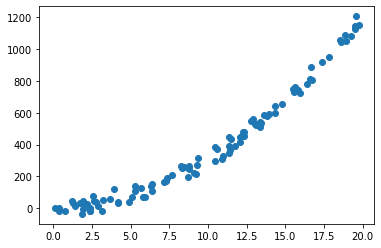

In [160]:
def pr_dataset_generator(x_multiplier,std_dev):
    np.random.seed(0)
    x = np.random.rand(100,1)*x_multiplier
    y = 3*(x**2)+np.random.randn(100,1)*std_dev
    return x, y

x,y=pr_dataset_generator(20,30)
plt.scatter(x, y)

In [161]:
def mse_loss(y_test, y_predicted):
    loss = 0
    for i in range(len(y_test)):
        loss += ((y_predicted[i] - y_test[i])**2)/len(y_test)
    return loss

In [162]:
def derivatives(x_train, y_train, y_predicted):
    n = len(x_train)
#     dw represents change in weights and db represents change in bias as per gradient descent algorithm
    y_new = []
    for i in range(n):
        y_new.append((y_predicted[i] - y_train[i])**3)
    np.array(y_new)
    dw = -(1/n)*(np.dot(x_train.T, y_new))
    db = -(1/n)*(np.sum(y_new))
    return dw,db
    

In [163]:
def x_transform(x, degrees):
    t = x.copy()
    
    for i in degrees:
        x = np.append(x, t**i, axis = 1)
    return x

In [164]:
def train(x, y, bs, degrees, epochs, lr):
    x = x_transform(x,degrees)
    
    m,n = x.shape
    
    w = np.zeros((n,1))
    b = 0
    
    y = y.reshape(m, 1)
    
    losses = []
    
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            start_i = i*bs
            end_i = start_i + bs
            x_train = x[start_i:end_i]
            y_train = y[start_i:end_i]
            
            y_predicted = np.dot(x_train, w)+b
            
            dw, db = derivatives(x_train, y_train, y_predicted)
            
            w-=dw*lr
            b-=db*lr
            
#         l = loss(y, np.dot(x, w)+b)
#         losses.append(l)
#     return w, b, losses
    return w, b

In [165]:
def predict(x, w, b, degrees):
    x1 = x_transform(x,degrees)
    return np.dot(x1, w)+b

C:\Users\Hp\AppData\Local\Temp/ipykernel_30768/2539975400.py:6: RuntimeWarning: overflow encountered in power
  y_new.append((y_predicted[i] - y_train[i])**3)


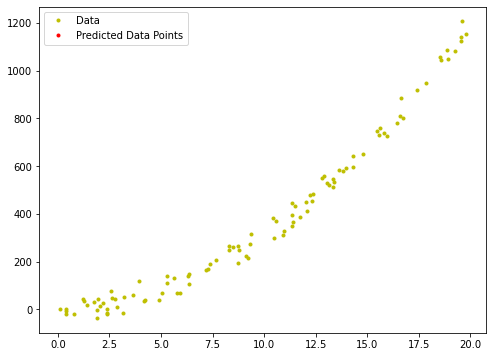

In [166]:
# old_settings = np.seterr(all='print')
# w, b, mse_loss = train(x, y, bs=100, degrees=[2], epochs=5,
#                 lr=0.0001)
w, b = train(x, y, bs=4, degrees=[2], epochs=10,
                lr=0.001)
# Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(x, y, 'y.')
plt.plot(x, predict(x, w, b, [2]), 'r.')
plt.legend(["Data", "Predicted Data Points"])
plt.show()